In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('placement (2).csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

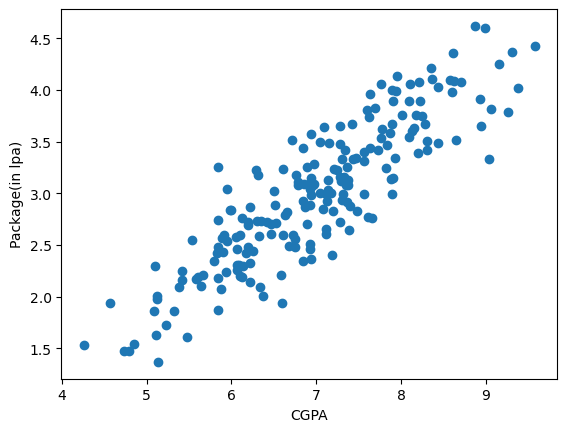

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
x_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [11]:
y_test.head()

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
Name: package, dtype: float64

In [12]:
x_train.head()

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77


In [13]:
x_test.iloc[0].values.reshape(1,1)

array([[8.58]])

In [14]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [15]:
def package():
    predictions = []
    for i in range(len(x_test)):
        prediction = lr.predict(x_test.iloc[i].values.reshape(1, -1))
        predictions.append(prediction)
    return predictions

In [16]:
package()

C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Atharva\ANACONDA

[array([3.89111601]),
 array([3.09324469]),
 array([2.38464568]),
 array([2.57434935]),
 array([1.6537286]),
 array([1.77647803]),
 array([2.07219258]),
 array([2.93143862]),
 array([3.76278706]),
 array([2.93701814]),
 array([4.09197872]),
 array([3.51170867]),
 array([2.97049525]),
 array([2.40138424]),
 array([3.18809652]),
 array([3.46707251]),
 array([1.94386362]),
 array([3.24389172]),
 array([2.97607477]),
 array([3.41685683]),
 array([2.55761079]),
 array([3.16577844]),
 array([2.85890486]),
 array([3.12114229]),
 array([3.68467378]),
 array([2.8700639]),
 array([3.49497011]),
 array([3.34432308]),
 array([3.91901361]),
 array([1.96060218]),
 array([3.65119666]),
 array([3.2104146]),
 array([3.74046898]),
 array([2.7863711]),
 array([2.78079158]),
 array([3.27178932]),
 array([3.52844723]),
 array([2.61340599]),
 array([2.65804215]),
 array([2.71383735])]

Text(0, 0.5, 'Package(in lpa)')

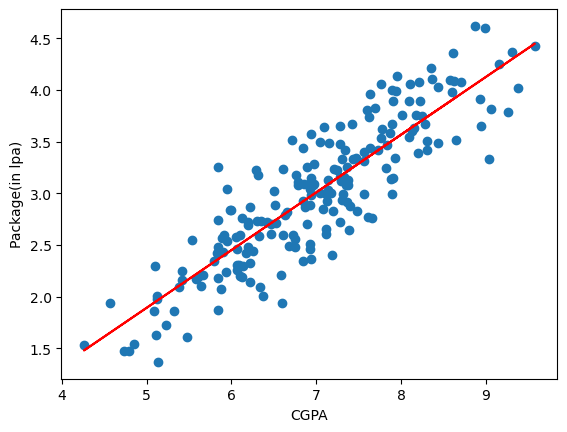

In [17]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
# plt.xlabel('CGPA')
# plt.ylabel('Package(in lpa)')

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
y_pred = lr.predict(x_test)

In [23]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [24]:
print("MAE",mean_absolute_error(y_test,y_pred)) # in terms of lpa

MAE 0.2884710931878175


In [29]:
print("MSE",mean_squared_error(y_test,y_pred))  # not in lpa

MSE 0.12129235313495527


In [28]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred))) # in terms of lpa

RMSE 0.34827051717731616


In [33]:
print("r2score",r2_score(y_test,y_pred))   
r2 = r2_score(y_test,y_pred)
# utna acha bhi nahi hai aur kharab bhi nahi hai
# cgpa column is explaining 78% varience of lpa col.

r2score 0.780730147510384


In [34]:
#  Adjusted r2 score
x_test.shape

(40, 1)

In [37]:
adj_r2score = 1 - ((1-r2)*(40-1)/(40-1-1)) 
adj_r2score

0.7749598882343415

In [41]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.881340,3.26
1,5.12,0.833922,1.98
2,7.82,0.533456,3.25
3,7.42,0.657887,3.67
4,6.94,0.539692,3.57


TypeError: 'str' object is not callable

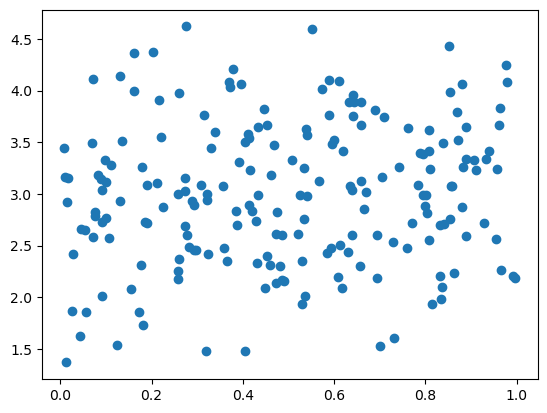

In [68]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package') 
plt.show

In [46]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,2] # or iloc[:,-1]

In [53]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=0.2,random_state=2)

In [54]:
lr.fit(x_train2,y_train2)

LinearRegression()

In [55]:
y_pred2 = lr.predict(x_test2)

In [56]:
r2 = r2_score(y_test2,y_pred2)
r2

0.7777920632279213

In [57]:
x_test.shape

(40, 2)

In [59]:
# Adjusted r2
adj_r2 = 1 - ((1-r2)*(40-1)/(40-1-2))
adj_r2

0.7657808234024035